### The Question
Based on the content of the Diwali Sales Analysis document, here are several analytical
 questions that could guide further exploration and visualization of the data:
 
 1. Customer Demographics and Behavior:
 - How does purchasing behavior vary across different age groups?
 - What are the differences in spending between genders?
 - How does marital status influence purchasing decisions?
 
 2. Geographic Trends:
 - Which states have the highest sales volume during the Diwali season?
 - Are there notable differences in product preferences across different zones (e.g., Western,
 Southern, Central)?

 
 3. Product Preferences:
 - What are the top-selling product categories during Diwali?
 - Which products generate the most revenue, and how does this vary by demographic
 factors?
 - Are there any products that perform significantly better in specific regions?
 
 
 4. Economic Impact:
 - How does occupation influence spending patterns during Diwali?
 - Which occupations tend to spend the most on Diwali shopping?
 
 
 5. Order Patterns:
 - How does the number of orders correlate with the total amount spent?
 - What are the trends in order volume over time during the Diwali season?
 
 
 6. Marketing and Strategy:
 - How can the data be used to tailor marketing strategies for different demographic groups?
 - What insights can be drawn to improve customer experience and increase revenue, as
 outlined in the project's objectives?


 7. Longitudinal Analysis:
 - If data across multiple years is available, how have the trends changed over time?
 - Are there any emerging patterns in new customer segments?
 
 
 These questions can be explored using various data visualization techniques such as time
 series analysis, heatmaps for geographic data, bar charts for demographic analysis, and line
 graphs to track changes over time. Each question aims to uncover deeper insights that can
 drive strategic decisions for future marketing campaigns and customer relationship
 management during Diwali sales.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading the CSV file and decoding it
diwali_df=pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')

#### STEP 1: INSPECTING THE DATA

In [3]:
#Checking the first few rows
diwali_df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
#Checking the number of rows and columns
diwali_df.shape

(11251, 15)

In [5]:
#The overview of the Data Frame
diwali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#Checking Summary Statistics
diwali_df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
#Checking missing values
diwali_df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
diwali_df.duplicated().sum()

np.int64(8)

#### STEP 2: CLEANING THE DATA

In [9]:
# Changing data type of Age
diwali_df=diwali_df.astype({'Age':int})

In [10]:
# Dropping columns with null values/ no input
diwali_df.drop(["Status"],axis=1,inplace= True)
diwali_df.drop(["unnamed1"],axis=1,inplace= True)

#### DATA VISUALISATION

In [11]:
#Checking styles available
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
diwali_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#How does purchasing behavior vary across different age groups?
px.histogram(diwali_df,x='Age Group',y= 'Orders'
             ,title= "The difference in purchasing behaviour among different Age Groups during Diwali")

The Age Group between 26-35 years has the highest purchases made during Diwali season in contrast to the Age Group of 0-17 years who spend the least during Diwali Season

In [14]:
#What are the differences in spending between genders?
fig=px.histogram(diwali_df,x="Gender",y="Orders")
fig.show()

The females spend more than males during Diwali season

In [20]:
#How does marital status influence purchasing decisions?
fig1=px.bar(diwali_df, x="Marital_Status", y="Orders")
fig1.show()


2. Geographic Trends:
 - Which states have the highest sales volume during the Diwali season?
 - Are there notable differences in product preferences across different zones (e.g., Western,
 Southern, Central)?

State
Uttar Pradesh       4813
Maharashtra         3811
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1070
Bihar               1062
Jharkhand            953
Uttarakhand          824
Rajasthan            555
Punjab               495
Telangana            312
Name: Orders, dtype: int64


C:\Users\Veronica Ndunge\AppData\Local\Temp\ipykernel_11028\4250524112.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




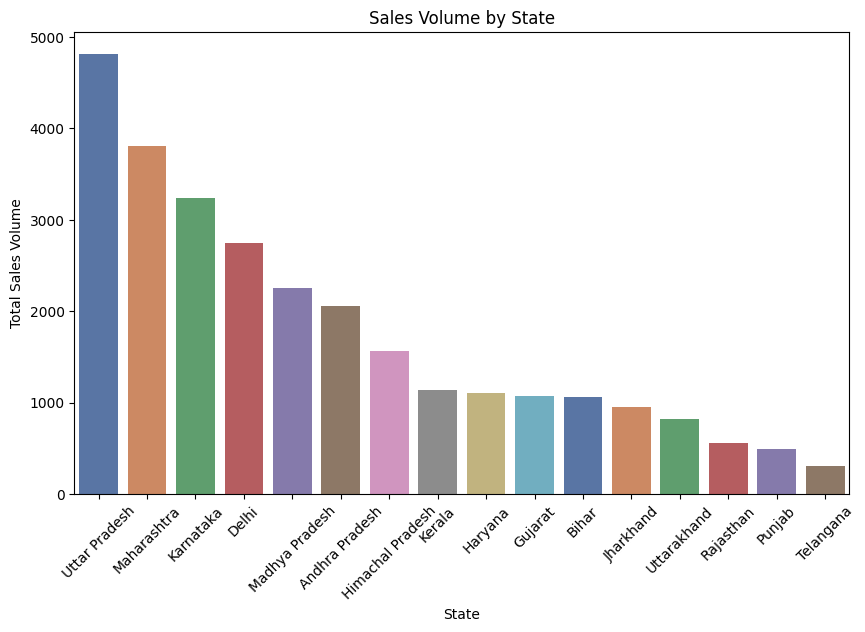

In [17]:
# Which states have the highest sales volume during the Diwali season?
#Sorting the sales to get the highest number per state
state_sales=diwali_df.groupby('State')['Orders'].sum()
state_sales_sorted=state_sales.sort_values(ascending=False)
print(state_sales_sorted)


plt.figure(figsize=(10,6))
sns.barplot(x=state_sales_sorted.index, y=state_sales_sorted.values,palette='deep')

plt.title('Sales Volume by State')
plt.xlabel('State')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.show()

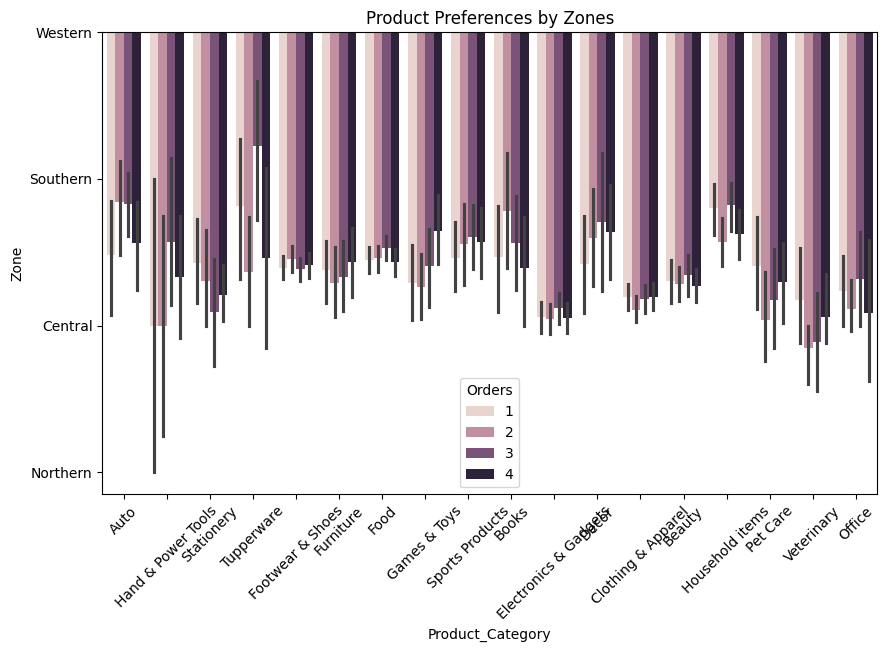

In [37]:
#Product Preferences across the zones

plt.figure(figsize=(10,6))
sns.barplot(diwali_df,x='Product_Category',y='Zone',hue='Orders')

plt.title('Product Preferences by Zones')
plt.xlabel('Product_Category')
plt.ylabel('Zone')
plt.xticks(rotation=45)
plt.show()


 3. Product Preferences:
  What are the top-selling product categories during Diwali?
  Which products generate the most revenue, and how does this vary by demographic factors?
 Are there any products that perform significantly better in specific regions?

Product_Category
Clothing & Apparel       6634
Food                     6120
Electronics & Gadgets    5226
Footwear & Shoes         2654
Household items          1331
Beauty                   1086
Games & Toys              940
Furniture                 890
Sports Products           870
Pet Care                  536
Stationery                281
Office                    261
Auto                      246
Books                     245
Decor                     235
Veterinary                206
Tupperware                166
Hand & Power Tools         80
Name: Orders, dtype: int64


C:\Users\Veronica Ndunge\AppData\Local\Temp\ipykernel_2676\1675631915.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




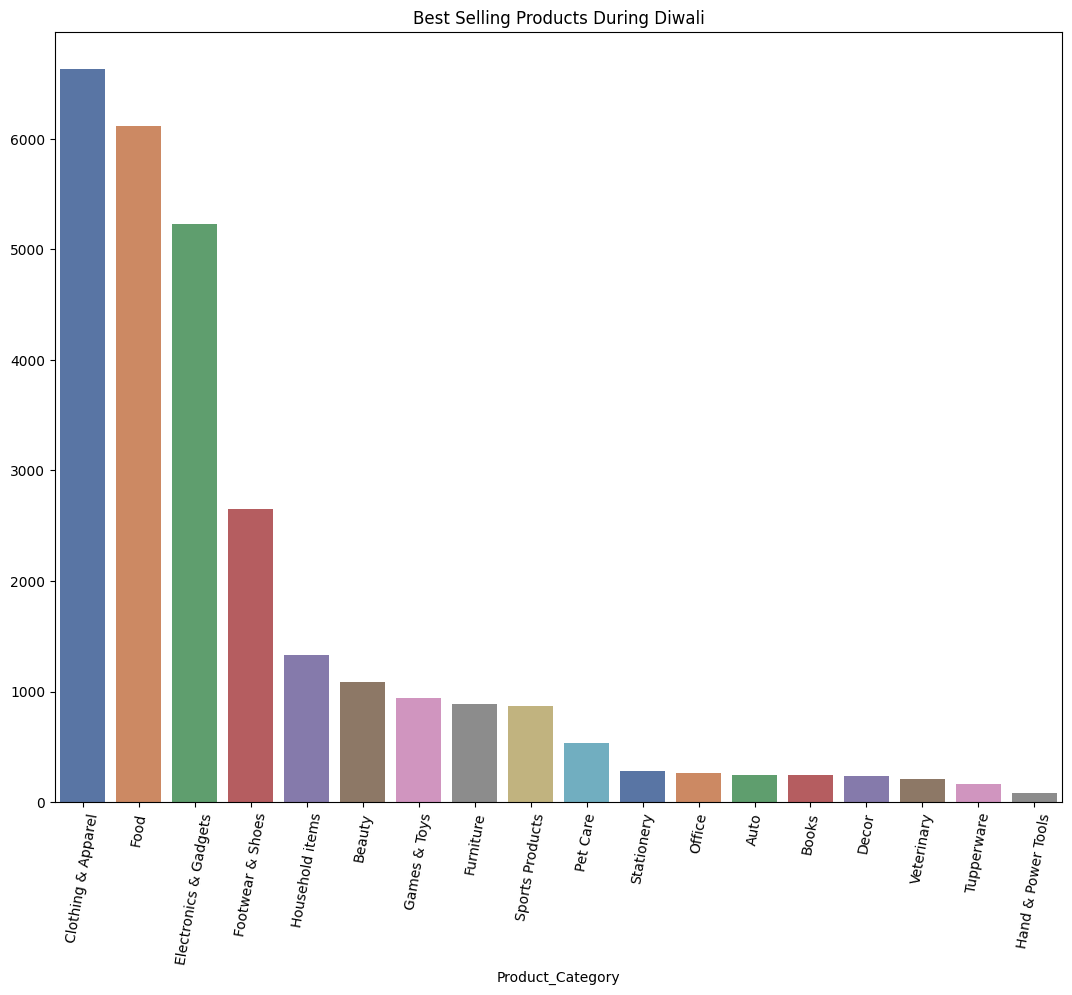

In [ ]:
#Aggregate by categories
category_sales=diwali_df.groupby('Product_Category')['Orders'].sum()
(category_sales)
#Checking the values in descending order
best_selling_categories=category_sales.sort_values(ascending=False)
print(best_selling_categories)

plt.figure(figsize=(13,10))
sns.barplot(x=best_selling_categories.index, y=best_selling_categories.values,palette='deep')

plt.title('Best Selling Products During Diwali')
plt.xticks(rotation=80)
plt.show()


In [30]:
diwali_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
# Which products generate the most revenue, and how does this vary by demographic factors?
fig=px.bar(diwali_df,x='Gender',y="Amount")
fig.show()

fig=px.bar(diwali_df,x='Age Group',y="Amount")
fig.show()


In [34]:
 # Are there any products that perform significantly better in specific regions?
region_sales=diwali_df.groupby("Product_Category")["Zone"].sum()
region_sales

region_best_products=region_sales.sort_values(ascending=False)
region_best_products




Product_Category
Sports Products          WesternWesternWesternSouthernCentralWesternWes...
Household items          WesternWesternWesternCentralSouthernNorthernSo...
Auto                     WesternSouthernCentralSouthernWesternNorthernC...
Decor                    WesternCentralWesternCentralCentralWesternCent...
Food                     SouthernWesternWesternSouthernCentralSouthernC...
Electronics & Gadgets    SouthernNorthernNorthernEasternSouthernNorther...
Clothing & Apparel       SouthernCentralWesternCentralWesternEasternSou...
Books                    SouthernCentralSouthernWesternEasternNorthernS...
Hand & Power Tools       SouthernCentralSouthernCentralSouthernWesternC...
Footwear & Shoes         SouthernCentralCentralSouthernCentralCentralCe...
Office                   NorthernCentralCentralWesternCentralCentralCen...
Stationery               NorthernCentralCentralCentralSouthernCentralCe...
Tupperware               CentralWesternWesternSouthernWesternSouthernEa...
Furnitur